In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Attivo Trainning\Technical Videos\AI_ML\Jupyter Notebook Daily Practice\Day13_15_07_2025\Air Passenger\AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)

In [5]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.columns = ['Passengers']

In [7]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
import matplotlib.pyplot as plt

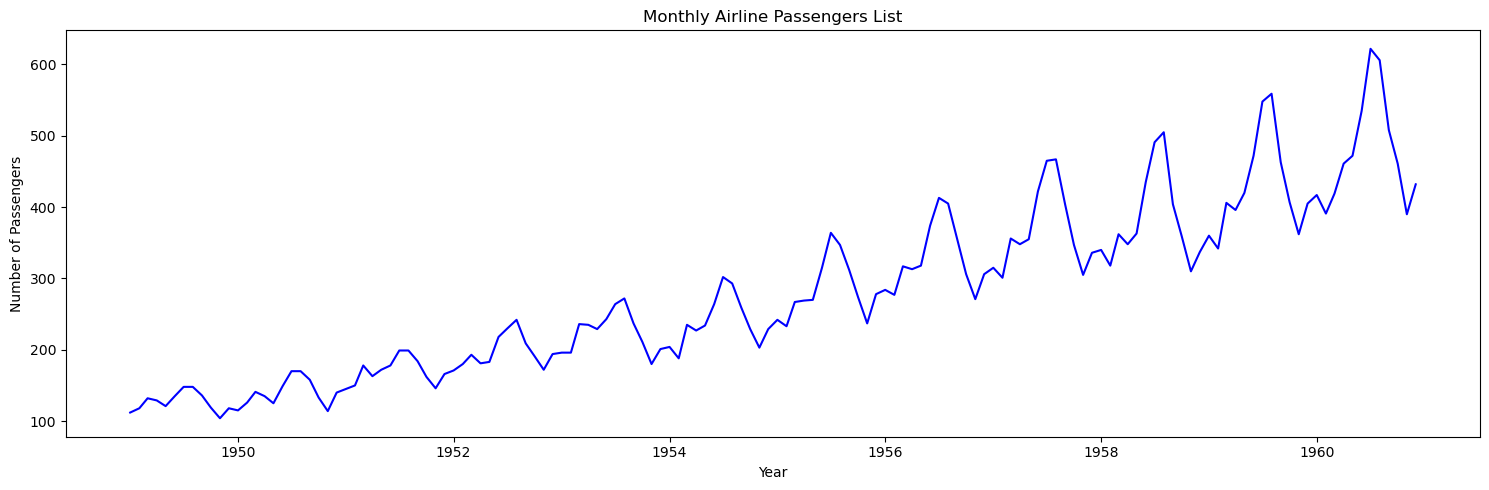

In [9]:
#Basic Time-Series Line Chart
plt.figure(figsize = (15,5))
plt.plot(df, color = 'blue')
plt.title("Monthly Airline Passengers List")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

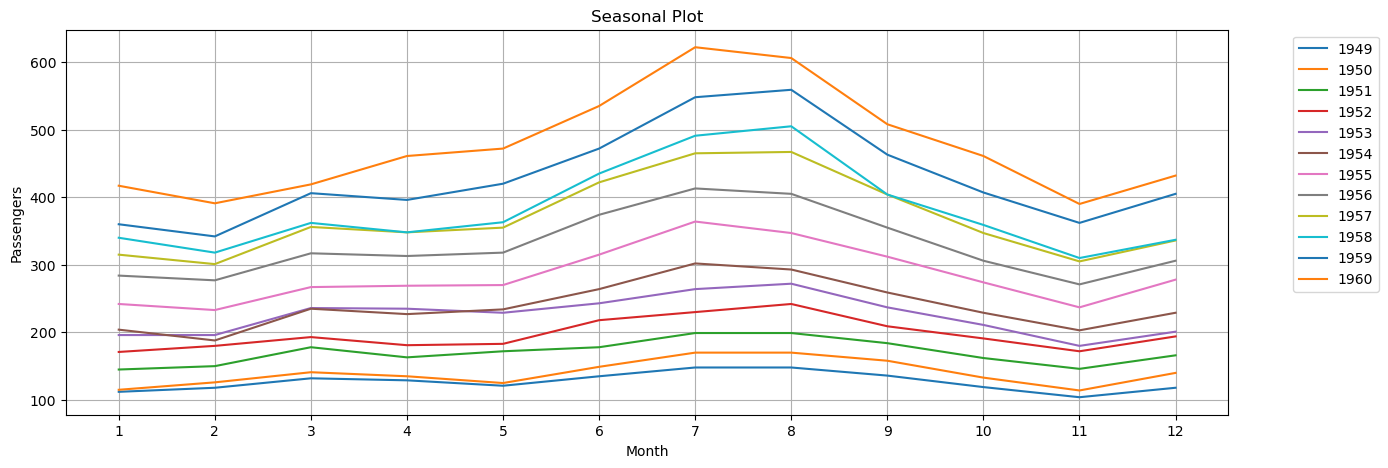

In [10]:
#Seasonal Plot
plt.figure(figsize = (15,5))
years = df.index.year.unique()
for year in years:
    plt.plot(df[df.index.year == year].index.month,
         df[df.index.year == year]['Passengers'],
         label = year)
plt.title("Seasonal Plot")
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left')
plt.xticks(range(1,13))
plt.show()

In [11]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
decomposition = seasonal_decompose(df, model = 'multiplicative')

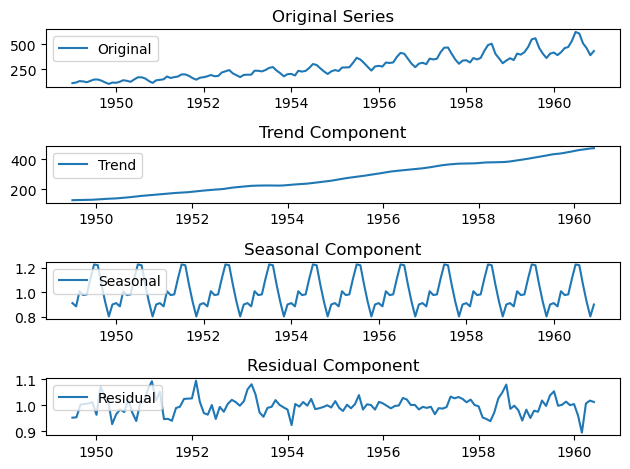

In [13]:
plt.subplot(4,1,1)
plt.plot(df, label = 'Original')
plt.legend(loc = 'upper left')
plt.title('Original Series')

plt.subplot(4,1,2)
plt.plot(decomposition.trend, label = 'Trend')
plt.legend(loc = 'upper left')
plt.title('Trend Component')

plt.subplot(4,1,3)
plt.plot(decomposition.seasonal, label = 'Seasonal')
plt.legend(loc = 'upper left')
plt.title('Seasonal Component')

plt.subplot(4,1,4)
plt.plot(decomposition.resid, label = 'Residual')
plt.legend(loc = 'upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [14]:
import seaborn as sns

<Axes: xlabel='Month', ylabel='Passengers'>

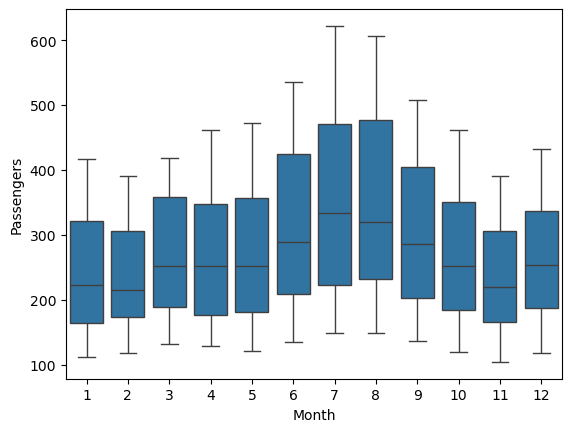

In [15]:
sns.boxplot(x = df.index.month, y = df['Passengers'])

In [16]:
#Stationary Check ADF Test
from statsmodels.tsa.stattools import adfuller

In [17]:
check = adfuller(df['Passengers'])

In [18]:
print('ADF stats:',check[0])

ADF stats: 0.8153688792060597


In [19]:
print('p-value:',check[1])

p-value: 0.9918802434376411


In [20]:
check

(np.float64(0.8153688792060597),
 np.float64(0.9918802434376411),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [21]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [22]:
df['Passengers_diff'] = df['Passengers'].diff()

In [23]:
df.head()

,Passengers,Passengers_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


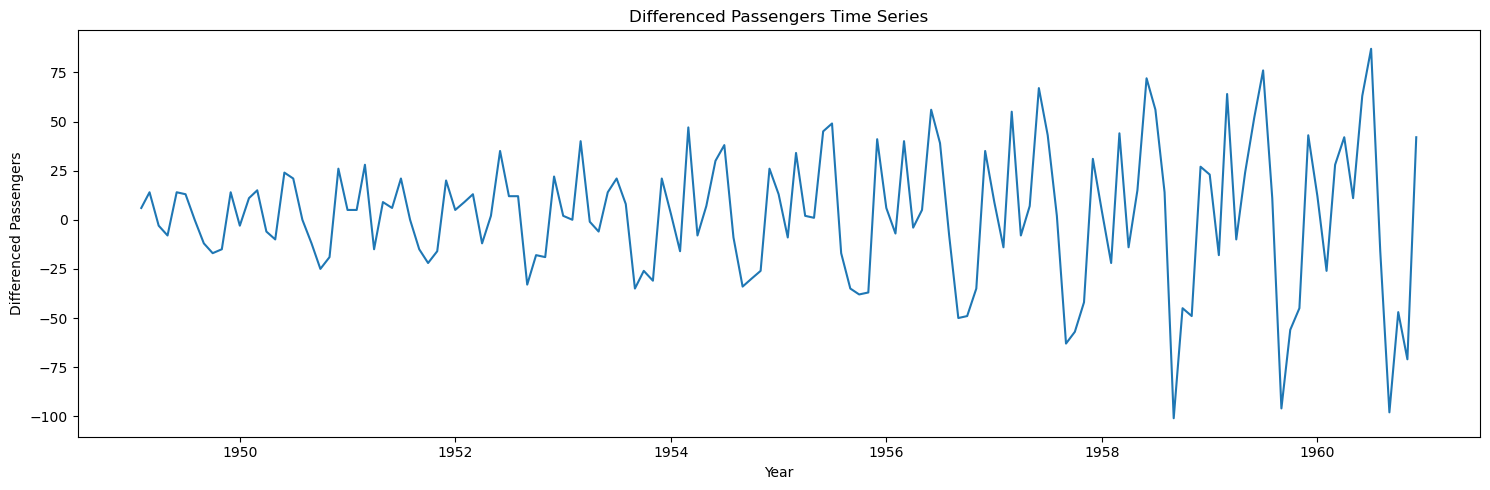

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df['Passengers_diff'])
plt.title('Differenced Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Differenced Passengers')
plt.tight_layout()
plt.show()

In [25]:
check2 = adfuller(df['Passengers_diff'].dropna())

In [26]:
check2

(np.float64(-2.829266824169992),
 np.float64(0.0542132902838265),
 12,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(988.5069317854085))

In [27]:
train_size = int(len(df)*0.9)
train, test = df['Passengers'][:train_size],df['Passengers'][train_size:]

In [28]:
model = ARIMA(train,order=(2,1,1))
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
model_fit

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  129
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -604.753
Date:                Wed, 16 Jul 2025   AIC                           1217.507
Time:                        13:22:41   BIC                           1228.915
Sample:                    01-01-1949   HQIC                          1222.142
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0810      0.105     10.263      0.000       0.875       1.287
ar.L2         -0.4722      0.102     -4.641      0.000      -0.672      -0.273
ma.L1         -0.8445      0.094     -8.981      0.000      -1.029      -0.660
sigma2       738.8362     92.922      7.951      0.000     556.712     920.961
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):                 1.63
Prob(Q):                              0.35   Prob(JB):                         0.44
Heteroskedasticity (H):               7.00   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
start_index = len(train)
end_index = len(train) + len(test) - 1
predictions = model_fit.predict(start = start_index, end = end_index)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mse = mean_squared_error(test, predictions)

In [34]:
mse

6510.318939796919

In [35]:
from math import sqrt

In [36]:
rmse = sqrt(mse)

In [37]:
rmse

80.68654745245281

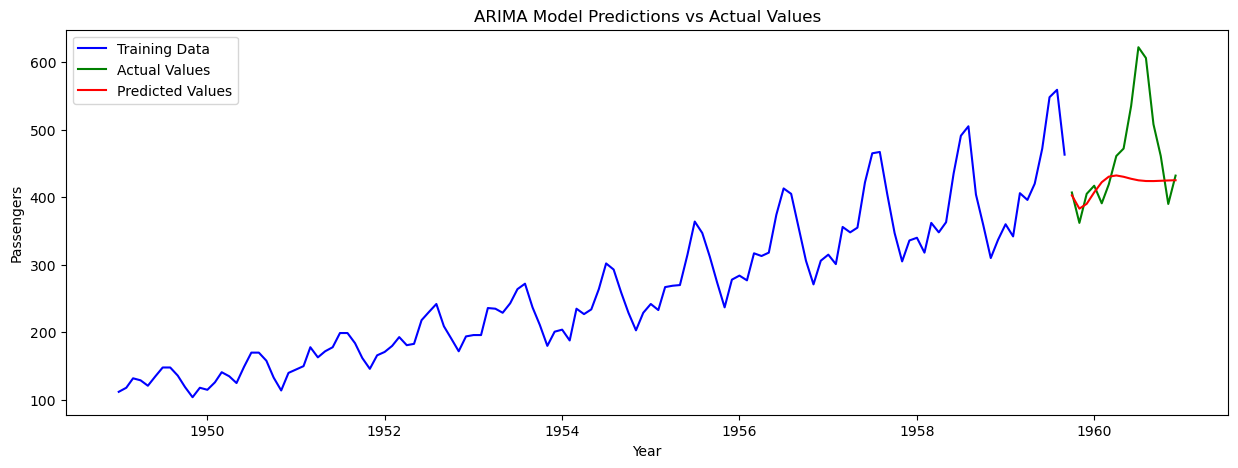

In [38]:
plt.figure(figsize=(15,5))
plt.plot(train,label = 'Training Data', color = 'blue')
plt.plot(test,label = 'Actual Values', color = 'green')
plt.plot(predictions,label = 'Predicted Values', color = 'red')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()